In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Data preparation

In [2]:
X, y = make_regression(n_samples=100, n_features=1, bias=10.0, noise=10.0, random_state=2)
y = np.expand_dims(y, axis=1)

print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


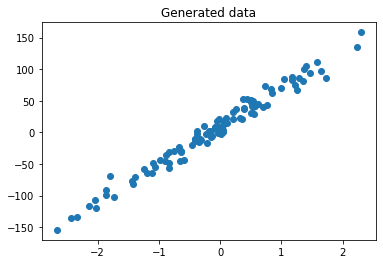

In [3]:
plt.scatter(X, y)
plt.title('Generated data')
plt.show()

### Data split

In [4]:
train_x = X[:80]
test_x = X[80:]

train_y = y[:80]
test_y = y[80:]

In [5]:
train_x.shape

(80, 1)

In [6]:
test_x.shape

(20, 1)

### Defining model

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation='linear', input_shape=(1,)))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

### Training

In [10]:
model.fit(train_x, train_y, batch_size=10, epochs=100, shuffle=True)

Epoch 1/100
8/8 [==============================] - 0s 715us/step - loss: 3089.5731 - mse: 3089.5731
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 2186.8746 - mse: 2186.8746
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 2190.2327 - mse: 2190.2327
Epoch 4/100
8/8 [==============================] - 0s 788us/step - loss: 1337.9636 - mse: 1337.9636
Epoch 5/100
8/8 [==============================] - 0s 837us/step - loss: 1084.9545 - mse: 1084.9545
Epoch 6/100
8/8 [==============================] - 0s 973us/step - loss: 691.3956 - mse: 691.3956
Epoch 7/100
8/8 [==============================] - 0s 981us/step - loss: 548.6681 - mse: 548.6681
Epoch 8/100
8/8 [==============================] - 0s 817us/step - loss: 427.1973 - mse: 427.1973
Epoch 9/100
8/8 [==============================] - 0s 793us/step - loss: 301.3767 - mse: 301.3767
Epoch 10/100
8/8 [==============================] - 0s 923us/step - loss: 303.8791 - mse: 303.8791
Epoch 11/100


8/8 [==============================] - 0s 1ms/step - loss: 56.0241 - mse: 56.0241
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 90.3569 - mse: 90.3568
Epoch 87/100
8/8 [==============================] - 0s 845us/step - loss: 86.7663 - mse: 86.7663
Epoch 88/100
8/8 [==============================] - 0s 1ms/step - loss: 82.4699 - mse: 82.4699
Epoch 89/100
8/8 [==============================] - 0s 930us/step - loss: 85.9371 - mse: 85.9371
Epoch 90/100
8/8 [==============================] - 0s 968us/step - loss: 82.1432 - mse: 82.1432
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 84.4519 - mse: 84.4519
Epoch 92/100
8/8 [==============================] - 0s 1ms/step - loss: 93.9051 - mse: 93.9051
Epoch 93/100
8/8 [==============================] - 0s 944us/step - loss: 79.6396 - mse: 79.6396
Epoch 94/100
8/8 [==============================] - 0s 912us/step - loss: 108.7023 - mse: 108.7023
Epoch 95/100
8/8 [==============================] -

### Test

In [11]:
y_pred = model.predict(test_x)

Text(0.5, 1.0, 'Model test')

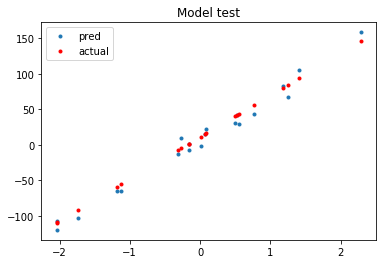

In [12]:
plt.plot(test_x, test_y,'.')
plt.plot(test_x, y_pred,'r.')
plt.legend(['pred', 'actual'])
plt.title('Model test')

### Weight / bias (advanced)

In [13]:
model.layers[0].get_weights()

[array([[59.013767]], dtype=float32), array([10.911439], dtype=float32)]

In [14]:
w1 = model.layers[0].get_weights()[0]
b1 = model.layers[0].get_weights()[1]

In [15]:
w1 = w1[0]
b1 = b1[0]

In [16]:
y_pred2 = test_x * w1 + b1

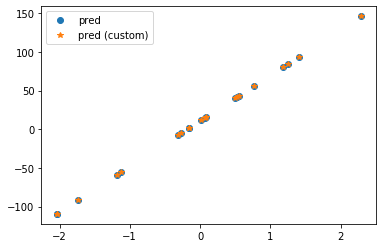

In [17]:
plt.plot(test_x, y_pred,'o')
plt.plot(test_x, y_pred2,'*')
plt.legend(['pred', 'pred (custom)'])

Text(0.5, 1.0, 'linear regression using keras')

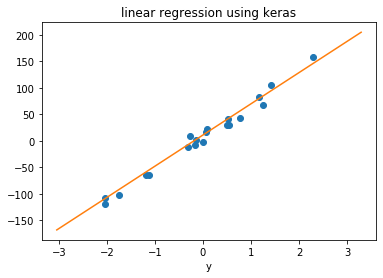

In [18]:
x1 = np.min(test_x)-1, np.max(test_x)+1
y1 = w1 * x1 + b1

plt.plot(test_x, test_y,'o')
plt.plot(x1, y1)
plt.xlabel('x')
plt.xlabel('y')
plt.title('linear regression using keras')

# References

Simple Linear Regression with Tensorflow 2.0, https://ayoteralab.tistory.com/entry/Tensorflow-20-05-Simple-Linear-Regression-3 or https://archive.is/ya44R